# In the previous project, you have learnt how to perform Exploratory Data Analysis (EDA).We used the customer churn dataset and walked you through various EDA methods. Now, its your turn to start your exploration journey.
## Here, we are providing you the NYC-trip duration dataset. 
### The aim of this assignment is just to explore the dataset and generate insights from it. 
#### Here is the description of all the variables / features available in the dataset which will help you to perform EDA:
#####  •	id - a unique identifier for each trip
#####  •	vendor_id - a code indicating the provider associated with the trip record
#####  •	pickup_datetime - date and time when the meter was engaged
#####  •	dropoff_datetime - date and time when the meter was disengaged
#####  •	passenger_count - the number of passengers in the vehicle (driver entered value)
#####  •	pickup_longitude - the longitude where the meter was engaged
#####  •	pickup_latitude - the latitude where the meter was engaged
#####  •	dropoff_longitude - the longitude where the meter was disengaged
#####  •	dropoff_latitude - the latitude where the meter was disengaged
#####  •	store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
#####  •	trip_duration - (target) duration of the trip in seconds
### You can download the dataset from the link given below and perform the EDA on this dataset. Once you have finished the EDA, submit the jupyter notebook and we will evaluate it.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("D:\\Sourav_Singh\\Excell ,SQL & Tableau\\Project_to_make\\nyc_taxi_trip_duration.csv")

In [2]:
# View Data
df

id  vendor_id      pickup_datetime     dropoff_datetime  \
0       id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1       id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2       id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3       id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4       id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   
...           ...        ...                  ...                  ...   
729317  id3905982          2  2016-05-21 13:29:38  2016-05-21 13:34:34   
729318  id0102861          1  2016-02-22 00:43:11  2016-02-22 00:48:26   
729319  id0439699          1  2016-04-15 18:56:48  2016-04-15 19:08:01   
729320  id2078912          1  2016-06-19 09:50:47  2016-06-19 09:58:14   
729321  id1053441          2  2016-01-01 17:24:16  2016-01-01 17:44:40   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                     1        -73.953918        40.778873         -73.963875   
1                     2        -73.988312        40.731743         -73.994751   
2                     2        -73.997314        40.721458         -73.948029   
3                     6        -73.961670        40.759720         -73.956779   
4                     1        -74.017120        40.708469         -73.988182   
...                 ...               ...              ...                ...   
729317                2        -73.965919        40.789780         -73.952637   
729318                1        -73.996666        40.737434         -74.001320   
729319                1        -73.997849        40.761696         -74.001488   
729320                1        -74.006706        40.708244         -74.013550   
729321                4        -74.003342        40.743839         -73.945847   

        dropoff_latitude store_and_fwd_flag  trip_duration  
0              40.771164                  N            400  
1              40.694931                  N           1100  
2              40.774918                  N           1635  
3              40.780628                  N           1141  
4              40.740631                  N            848  
...                  ...                ...            ...  
729317         40.789181                  N            296  
729318         40.731911                  N            315  
729319         40.741207                  N            673  
729320         40.713814                  N            447  
729321         40.712841                  N           1224  

[729322 rows x 11 columns]

In [3]:
df.shape

(729322, 11)

In [4]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
# List of numerical columns to calculate IQR for
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Function to calculate IQR and identify outliers
def detect_outliers_iqr(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return Q1, Q3, IQR, outliers

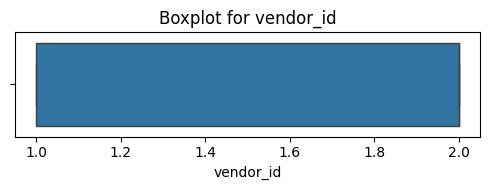

Column: vendor_id
Q1: 1.0, Q3: 2.0, IQR: 1.0
Number of outliers in vendor_id: 0




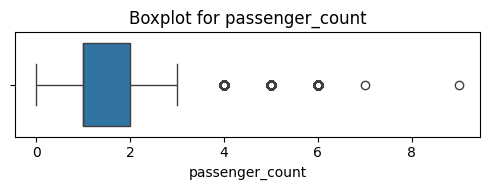

Column: passenger_count
Q1: 1.0, Q3: 2.0, IQR: 1.0
Number of outliers in passenger_count: 77085




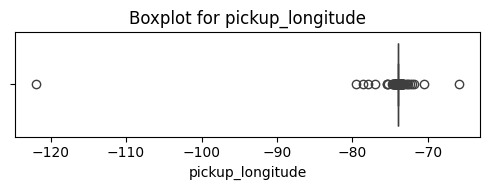

Column: pickup_longitude
Q1: -73.99185943603516, Q3: -73.96736145019531, IQR: 0.02449798583984375
Number of outliers in pickup_longitude: 42211




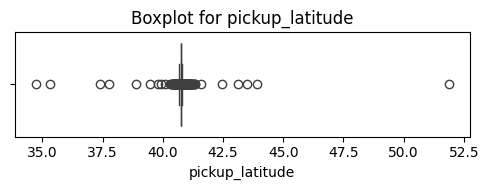

Column: pickup_latitude
Q1: 40.73733520507813, Q3: 40.768314361572266, IQR: 0.03097915649413352
Number of outliers in pickup_latitude: 26379




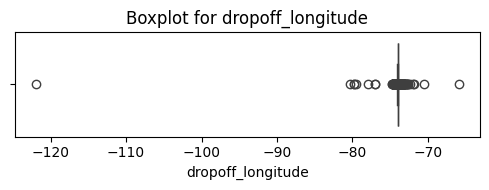

Column: dropoff_longitude
Q1: -73.99131774902342, Q3: -73.9630355834961, IQR: 0.02828216552732954
Number of outliers in dropoff_longitude: 38994




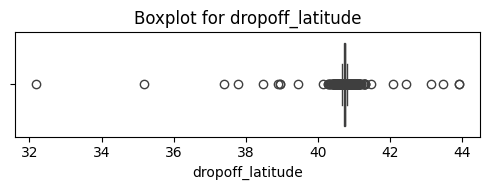

Column: dropoff_latitude
Q1: 40.735931396484375, Q3: 40.76974105834961, IQR: 0.033809661865234375
Number of outliers in dropoff_latitude: 36246




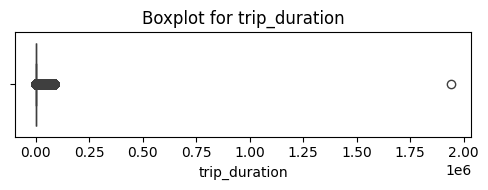

Column: trip_duration
Q1: 397.0, Q3: 1075.0, IQR: 678.0
Number of outliers in trip_duration: 36963


In [7]:
# Loop through each numerical column, calculate IQR, detect outliers, and create boxplots
for column in numerical_columns:
    Q1, Q3, IQR, outliers = detect_outliers_iqr(df, column)

    # Create a boxplot to visualize the outliers
    print( "\n" )
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()
    
    print(f"Column: {column}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Number of outliers in {column}: {len(outliers)}")
#   print(outliers, "\n")

In [8]:
# Find the pearson correlations matrix
df_corr = df.select_dtypes(include=['float64', 'int64'])
df_corr_num = df_corr.corr(method = 'pearson')
df_corr_num

vendor_id  passenger_count  pickup_longitude  \
vendor_id           1.000000         0.286463          0.008198   
passenger_count     0.286463         1.000000          0.001163   
pickup_longitude    0.008198         0.001163          1.000000   
pickup_latitude     0.002861        -0.004696          0.047635   
dropoff_longitude   0.002371        -0.000027          0.780647   
dropoff_latitude    0.005259        -0.003944          0.118473   
trip_duration       0.027752         0.013022          0.035447   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
vendor_id                 0.002861           0.002371          0.005259   
passenger_count          -0.004696          -0.000027         -0.003944   
pickup_longitude          0.047635           0.780647          0.118473   
pickup_latitude           1.000000           0.119970          0.479352   
dropoff_longitude         0.119970           1.000000          0.149598   
dropoff_latitude          0.479352           0.149598          1.000000   
trip_duration            -0.038163           0.020664         -0.028283   

                   trip_duration  
vendor_id               0.027752  
passenger_count         0.013022  
pickup_longitude        0.035447  
pickup_latitude        -0.038163  
dropoff_longitude       0.020664  
dropoff_latitude       -0.028283  
trip_duration           1.000000

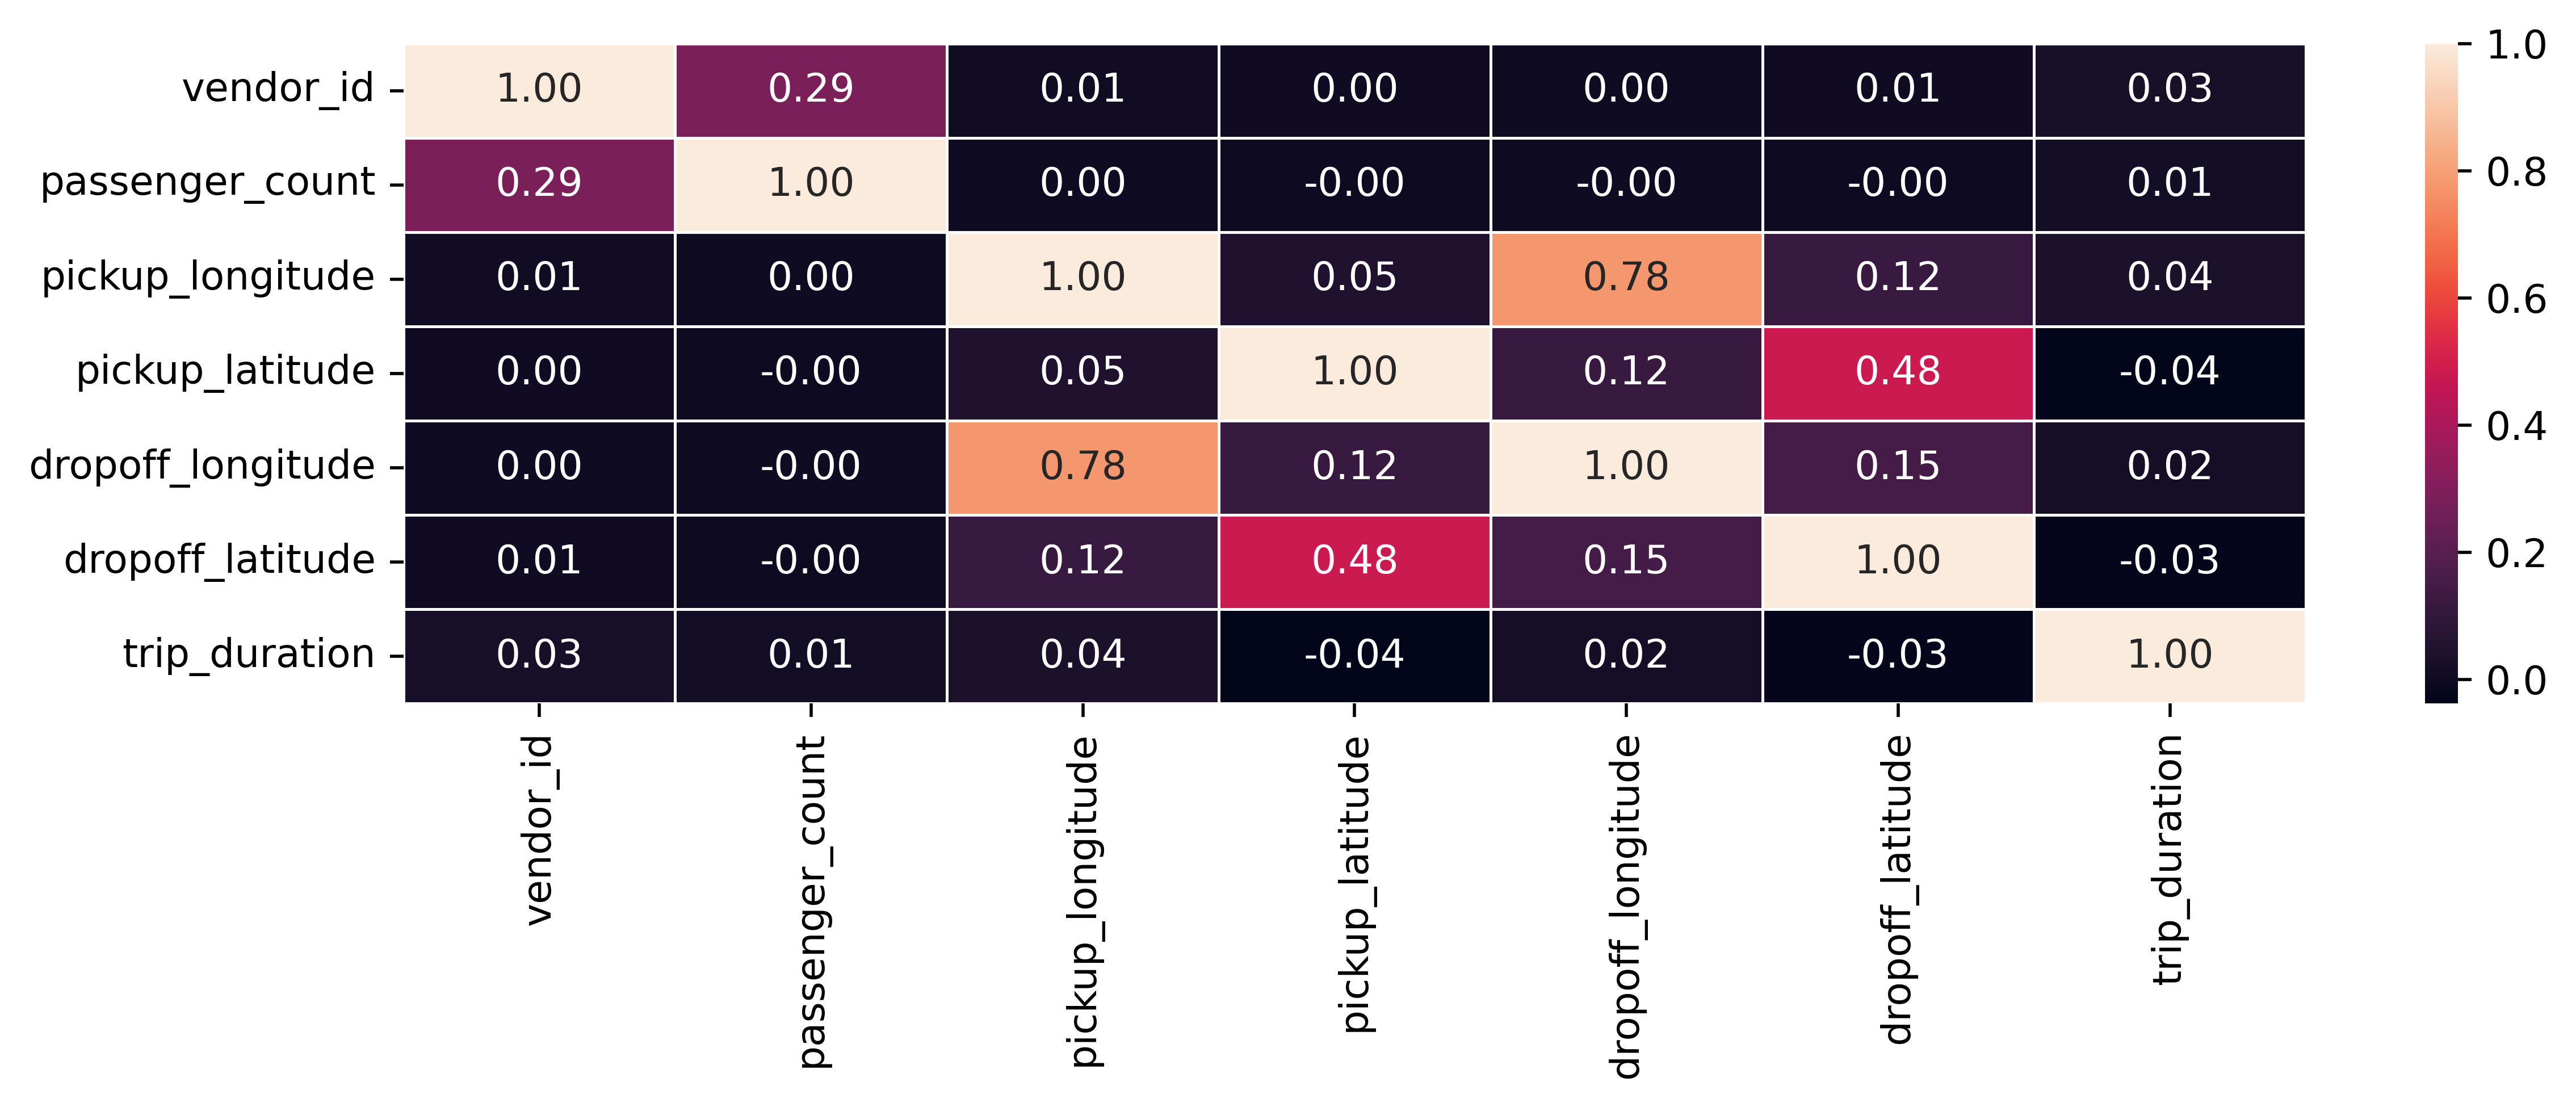

In [9]:
plt.figure(figsize=(10,4), dpi =500)
sns.heatmap(df_corr_num,annot=True,fmt=".2f", linewidth=.5)
plt.tight_layout()
plt.show()

In [10]:
df["id"].unique()

array(['id1080784', 'id0889885', 'id0857912', ..., 'id0439699',
       'id2078912', 'id1053441'], dtype=object)

In [11]:
df["id"].describe()

count        729322
unique       729322
top       id1053441
freq              1
Name: id, dtype: object

In [12]:
df["vendor_id"].unique()

array([2, 1])

In [13]:
df['vendor_id'] = df['vendor_id'].astype(str)

In [14]:
df["vendor_id"].unique()

array(['2', '1'], dtype=object)

In [15]:
df["id"].dtype

dtype('O')

In [16]:
df["store_and_fwd_flag"].unique()

array(['N', 'Y'], dtype=object)

In [17]:
df["store_and_fwd_flag"].mode()

0    N
Name: store_and_fwd_flag, dtype: object

In [18]:
df["store_and_fwd_flag"].mode()[0]

'N'

In [19]:
print(df['store_and_fwd_flag'].value_counts())

store_and_fwd_flag
N    725282
Y      4040
Name: count, dtype: int64


In [20]:
# Percentage of 'N' and 'Y'
print(df['store_and_fwd_flag'].value_counts(1)*100)

store_and_fwd_flag
N    99.446061
Y     0.553939
Name: proportion, dtype: float64


In [21]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].cat.remove_unused_categories()

In [22]:
df.loc[df['store_and_fwd_flag'] == 'Y'].head()

id vendor_id      pickup_datetime     dropoff_datetime  \
378   id1347533         1  2016-05-27 18:09:01  2016-05-27 18:16:30   
400   id2733049         1  2016-03-02 20:05:12  2016-03-02 20:52:52   
501   id2484490         1  2016-01-21 08:07:13  2016-01-21 08:18:21   
644   id2090829         1  2016-01-11 12:10:13  2016-01-11 12:25:41   
1278  id0512889         1  2016-06-10 21:20:14  2016-06-10 21:26:51   

      passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
378                 1        -73.976051        40.744671         -73.979721   
400                 2        -73.978134        40.757484         -73.998955   
501                 1        -73.999771        40.739487         -73.983940   
644                 2        -74.013611        40.714310         -73.976601   
1278                1        -73.958183        40.766190         -73.956032   

      dropoff_latitude store_and_fwd_flag  trip_duration  
378          40.722958                  Y            449  
400          40.614380                  Y           2860  
501          40.761421                  Y            668  
644          40.751938                  Y            928  
1278         40.782814                  Y            397

In [23]:
# removing 'store_and_fwd_flag' column because it doesn't impact our dataset.
df = df.drop(columns=['store_and_fwd_flag'])

In [24]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [25]:
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 729322 non-null  object        
 1   vendor_id          729322 non-null  object        
 2   pickup_datetime    729322 non-null  datetime64[ns]
 3   dropoff_datetime   729322 non-null  datetime64[ns]
 4   passenger_count    729322 non-null  int64         
 5   pickup_longitude   729322 non-null  float64       
 6   pickup_latitude    729322 non-null  float64       
 7   dropoff_longitude  729322 non-null  float64       
 8   dropoff_latitude   729322 non-null  float64       
 9   trip_duration      729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 55.6+ MB


In [27]:
# Extract categorical columns from the dataframe
# Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df[["vendor_id"]].columns.tolist()

In [28]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [29]:
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

In [30]:
# Create a DataFrame with the one-hot encoded columns
# We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

In [31]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

In [32]:
# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [33]:
df_encoded

id     pickup_datetime    dropoff_datetime  passenger_count  \
0       id1080784 2016-02-29 16:40:21 2016-02-29 16:47:01                1   
1       id0889885 2016-03-11 23:35:37 2016-03-11 23:53:57                2   
2       id0857912 2016-02-21 17:59:33 2016-02-21 18:26:48                2   
3       id3744273 2016-01-05 09:44:31 2016-01-05 10:03:32                6   
4       id0232939 2016-02-17 06:42:23 2016-02-17 06:56:31                1   
...           ...                 ...                 ...              ...   
729317  id3905982 2016-05-21 13:29:38 2016-05-21 13:34:34                2   
729318  id0102861 2016-02-22 00:43:11 2016-02-22 00:48:26                1   
729319  id0439699 2016-04-15 18:56:48 2016-04-15 19:08:01                1   
729320  id2078912 2016-06-19 09:50:47 2016-06-19 09:58:14                1   
729321  id1053441 2016-01-01 17:24:16 2016-01-01 17:44:40                4   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.953918        40.778873         -73.963875   
1             -73.988312        40.731743         -73.994751   
2             -73.997314        40.721458         -73.948029   
3             -73.961670        40.759720         -73.956779   
4             -74.017120        40.708469         -73.988182   
...                  ...              ...                ...   
729317        -73.965919        40.789780         -73.952637   
729318        -73.996666        40.737434         -74.001320   
729319        -73.997849        40.761696         -74.001488   
729320        -74.006706        40.708244         -74.013550   
729321        -74.003342        40.743839         -73.945847   

        dropoff_latitude  trip_duration  vendor_id_1  vendor_id_2  
0              40.771164            400          0.0          1.0  
1              40.694931           1100          1.0          0.0  
2              40.774918           1635          0.0          1.0  
3              40.780628           1141          0.0          1.0  
4              40.740631            848          1.0          0.0  
...                  ...            ...          ...          ...  
729317         40.789181            296          0.0          1.0  
729318         40.731911            315          1.0          0.0  
729319         40.741207            673          1.0          0.0  
729320         40.713814            447          1.0          0.0  
729321         40.712841           1224          0.0          1.0  

[729322 rows x 11 columns]

In [34]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 729322 non-null  object        
 1   pickup_datetime    729322 non-null  datetime64[ns]
 2   dropoff_datetime   729322 non-null  datetime64[ns]
 3   passenger_count    729322 non-null  int64         
 4   pickup_longitude   729322 non-null  float64       
 5   pickup_latitude    729322 non-null  float64       
 6   dropoff_longitude  729322 non-null  float64       
 7   dropoff_latitude   729322 non-null  float64       
 8   trip_duration      729322 non-null  int64         
 9   vendor_id_1        729322 non-null  float64       
 10  vendor_id_2        729322 non-null  float64       
dtypes: datetime64[ns](2), float64(6), int64(2), object(1)
memory usage: 61.2+ MB


In [35]:
df_encoded['pickup_hour'] = df_encoded['pickup_datetime'].dt.hour
df_encoded['pickup_day'] = df_encoded['pickup_datetime'].dt.dayofweek
df_encoded['pickup_month'] = df_encoded['pickup_datetime'].dt.month

In [36]:
df_encoded['is_weekend'] = df_encoded['pickup_datetime'].dt.weekday >= 5
df_encoded['weekend'] = df_encoded['is_weekend'].map({True: 1, False: 0})
df_encoded['rush_hour'] = df_encoded['pickup_hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)
df_encoded['log_trip_duration'] = np.log1p(df_encoded['trip_duration'])

In [37]:
# Define the distance function to calculate the distance between two points
def distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in kilometers
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c  # Returns distance in kilometers

In [38]:
# Calculate trip_distance using distance formula
df_encoded['trip_distance'] = distance(df_encoded['pickup_latitude'], df_encoded['pickup_longitude'],
                                  df_encoded['dropoff_latitude'], df_encoded['dropoff_longitude'])

In [39]:
# Print the DataFrame with calculated distances
print(df_encoded['trip_distance'])

0         1.199073
1         4.129111
2         7.250753
3         2.361097
4         4.328534
            ...   
729317    1.120223
729318    0.728705
729319    2.298776
729320    0.846316
729321    5.945837
Name: trip_distance, Length: 729322, dtype: float64


In [40]:
# Step 4: Drop unnecessary columns (like 'id', 'pickup_datetime', etc.)
df_encoded_dt = df_encoded.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime',"pickup_longitude","pickup_latitude",
                                         "dropoff_longitude","dropoff_latitude","is_weekend","trip_duration"])

In [41]:
df_encoded_dt

passenger_count  vendor_id_1  vendor_id_2  pickup_hour  pickup_day  \
0                     1          0.0          1.0           16           0   
1                     2          1.0          0.0           23           4   
2                     2          0.0          1.0           17           6   
3                     6          0.0          1.0            9           1   
4                     1          1.0          0.0            6           2   
...                 ...          ...          ...          ...         ...   
729317                2          0.0          1.0           13           5   
729318                1          1.0          0.0            0           0   
729319                1          1.0          0.0           18           4   
729320                1          1.0          0.0            9           6   
729321                4          0.0          1.0           17           4   

        pickup_month  weekend  rush_hour  log_trip_duration  trip_distance  
0                  2        0          0           5.993961       1.199073  
1                  3        0          0           7.003974       4.129111  
2                  2        1          1           7.400010       7.250753  
3                  1        0          1           7.040536       2.361097  
4                  2        0          0           6.744059       4.328534  
...              ...      ...        ...                ...            ...  
729317             5        1          0           5.693732       1.120223  
729318             2        0          0           5.755742       0.728705  
729319             4        0          1           6.513230       2.298776  
729320             6        1          1           6.104793       0.846316  
729321             1        0          1           7.110696       5.945837  

[729322 rows x 10 columns]

In [42]:
# New column order
new_order = ['passenger_count', 'vendor_id_1', 'vendor_id_2',"pickup_hour","pickup_day","pickup_month",
              "rush_hour","weekend","log_trip_duration","trip_distance"]

In [43]:
# Reorder the columns
df_encoded_dt = df_encoded_dt [new_order]

In [44]:
df_encoded_dt.columns

Index(['passenger_count', 'vendor_id_1', 'vendor_id_2', 'pickup_hour',
       'pickup_day', 'pickup_month', 'rush_hour', 'weekend',
       'log_trip_duration', 'trip_distance'],
      dtype='object')

In [45]:
df_encoded_dt

passenger_count  vendor_id_1  vendor_id_2  pickup_hour  pickup_day  \
0                     1          0.0          1.0           16           0   
1                     2          1.0          0.0           23           4   
2                     2          0.0          1.0           17           6   
3                     6          0.0          1.0            9           1   
4                     1          1.0          0.0            6           2   
...                 ...          ...          ...          ...         ...   
729317                2          0.0          1.0           13           5   
729318                1          1.0          0.0            0           0   
729319                1          1.0          0.0           18           4   
729320                1          1.0          0.0            9           6   
729321                4          0.0          1.0           17           4   

        pickup_month  rush_hour  weekend  log_trip_duration  trip_distance  
0                  2          0        0           5.993961       1.199073  
1                  3          0        0           7.003974       4.129111  
2                  2          1        1           7.400010       7.250753  
3                  1          1        0           7.040536       2.361097  
4                  2          0        0           6.744059       4.328534  
...              ...        ...      ...                ...            ...  
729317             5          0        1           5.693732       1.120223  
729318             2          0        0           5.755742       0.728705  
729319             4          1        0           6.513230       2.298776  
729320             6          1        1           6.104793       0.846316  
729321             1          1        0           7.110696       5.945837  

[729322 rows x 10 columns]

In [46]:
df_encoded_dt.isnull().sum()

passenger_count      0
vendor_id_1          0
vendor_id_2          0
pickup_hour          0
pickup_day           0
pickup_month         0
rush_hour            0
weekend              0
log_trip_duration    0
trip_distance        0
dtype: int64

In [47]:
df_encoded_dt.describe()

passenger_count    vendor_id_1    vendor_id_2    pickup_hour  \
count    729322.000000  729322.000000  729322.000000  729322.000000   
mean          1.662055       0.464597       0.535403      13.611698   
std           1.312446       0.498745       0.498745       6.402853   
min           0.000000       0.000000       0.000000       0.000000   
25%           1.000000       0.000000       0.000000       9.000000   
50%           1.000000       0.000000       1.000000      14.000000   
75%           2.000000       1.000000       1.000000      19.000000   
max           9.000000       1.000000       1.000000      23.000000   

          pickup_day   pickup_month      rush_hour        weekend  \
count  729322.000000  729322.000000  729322.000000  729322.000000   
mean        3.049081       3.518410       0.307572       0.285106   
std         1.954470       1.680661       0.461489       0.451465   
min         0.000000       1.000000       0.000000       0.000000   
25%         1.000000       2.000000       0.000000       0.000000   
50%         3.000000       4.000000       0.000000       0.000000   
75%         5.000000       5.000000       1.000000       1.000000   
max         6.000000       6.000000       1.000000       1.000000   

       log_trip_duration  trip_distance  
count      729322.000000  729322.000000  
mean            6.467113       3.441139  
std             0.794734       4.353132  
min             0.693147       0.000000  
25%             5.986452       1.232695  
50%             6.498282       2.095672  
75%             6.981006       3.876481  
max            14.478063    1240.908677

In [48]:
# Find the pearson correlations matrix
corr_cont = df_encoded_dt.corr(method = 'pearson')
corr_cont  

passenger_count  vendor_id_1  vendor_id_2  pickup_hour  \
passenger_count           1.000000    -0.286463     0.286463     0.009851   
vendor_id_1              -0.286463     1.000000    -1.000000    -0.009772   
vendor_id_2               0.286463    -1.000000     1.000000     0.009772   
pickup_hour               0.009851    -0.009772     0.009772     1.000000   
pickup_day                0.025758    -0.000787     0.000787    -0.082079   
pickup_month             -0.001481     0.005363    -0.005363    -0.003301   
rush_hour                -0.013185    -0.006154     0.006154     0.020344   
weekend                   0.030144    -0.002616     0.002616    -0.088178   
log_trip_duration         0.020749    -0.019439     0.019439     0.038880   
trip_distance             0.009175    -0.006510     0.006510    -0.016269   

                   pickup_day  pickup_month  rush_hour   weekend  \
passenger_count      0.025758     -0.001481  -0.013185  0.030144   
vendor_id_1         -0.000787      0.005363  -0.006154 -0.002616   
vendor_id_2          0.000787     -0.005363   0.006154  0.002616   
pickup_hour         -0.082079     -0.003301   0.020344 -0.088178   
pickup_day           1.000000     -0.013626  -0.087239  0.782156   
pickup_month        -0.013626      1.000000  -0.005569 -0.008226   
rush_hour           -0.087239     -0.005569   1.000000 -0.092659   
weekend              0.782156     -0.008226  -0.092659  1.000000   
log_trip_duration   -0.028439      0.047342   0.000803 -0.054805   
trip_distance        0.007786      0.016581  -0.045917  0.010417   

                   log_trip_duration  trip_distance  
passenger_count             0.020749       0.009175  
vendor_id_1                -0.019439      -0.006510  
vendor_id_2                 0.019439       0.006510  
pickup_hour                 0.038880      -0.016269  
pickup_day                 -0.028439       0.007786  
pickup_month                0.047342       0.016581  
rush_hour                   0.000803      -0.045917  
weekend                    -0.054805       0.010417  
log_trip_duration           1.000000       0.566067  
trip_distance               0.566067       1.000000

In [49]:
# correaltions between log_trip_duration and trip_distance columns
c = np.corrcoef(corr_cont['log_trip_duration'],corr_cont['trip_distance'])
print('Correlations between log_trip_duration and trip_distance \n ',c)

Correlations between log_trip_duration and trip_distance 
  [[1.         0.82009173]
 [0.82009173 1.        ]]


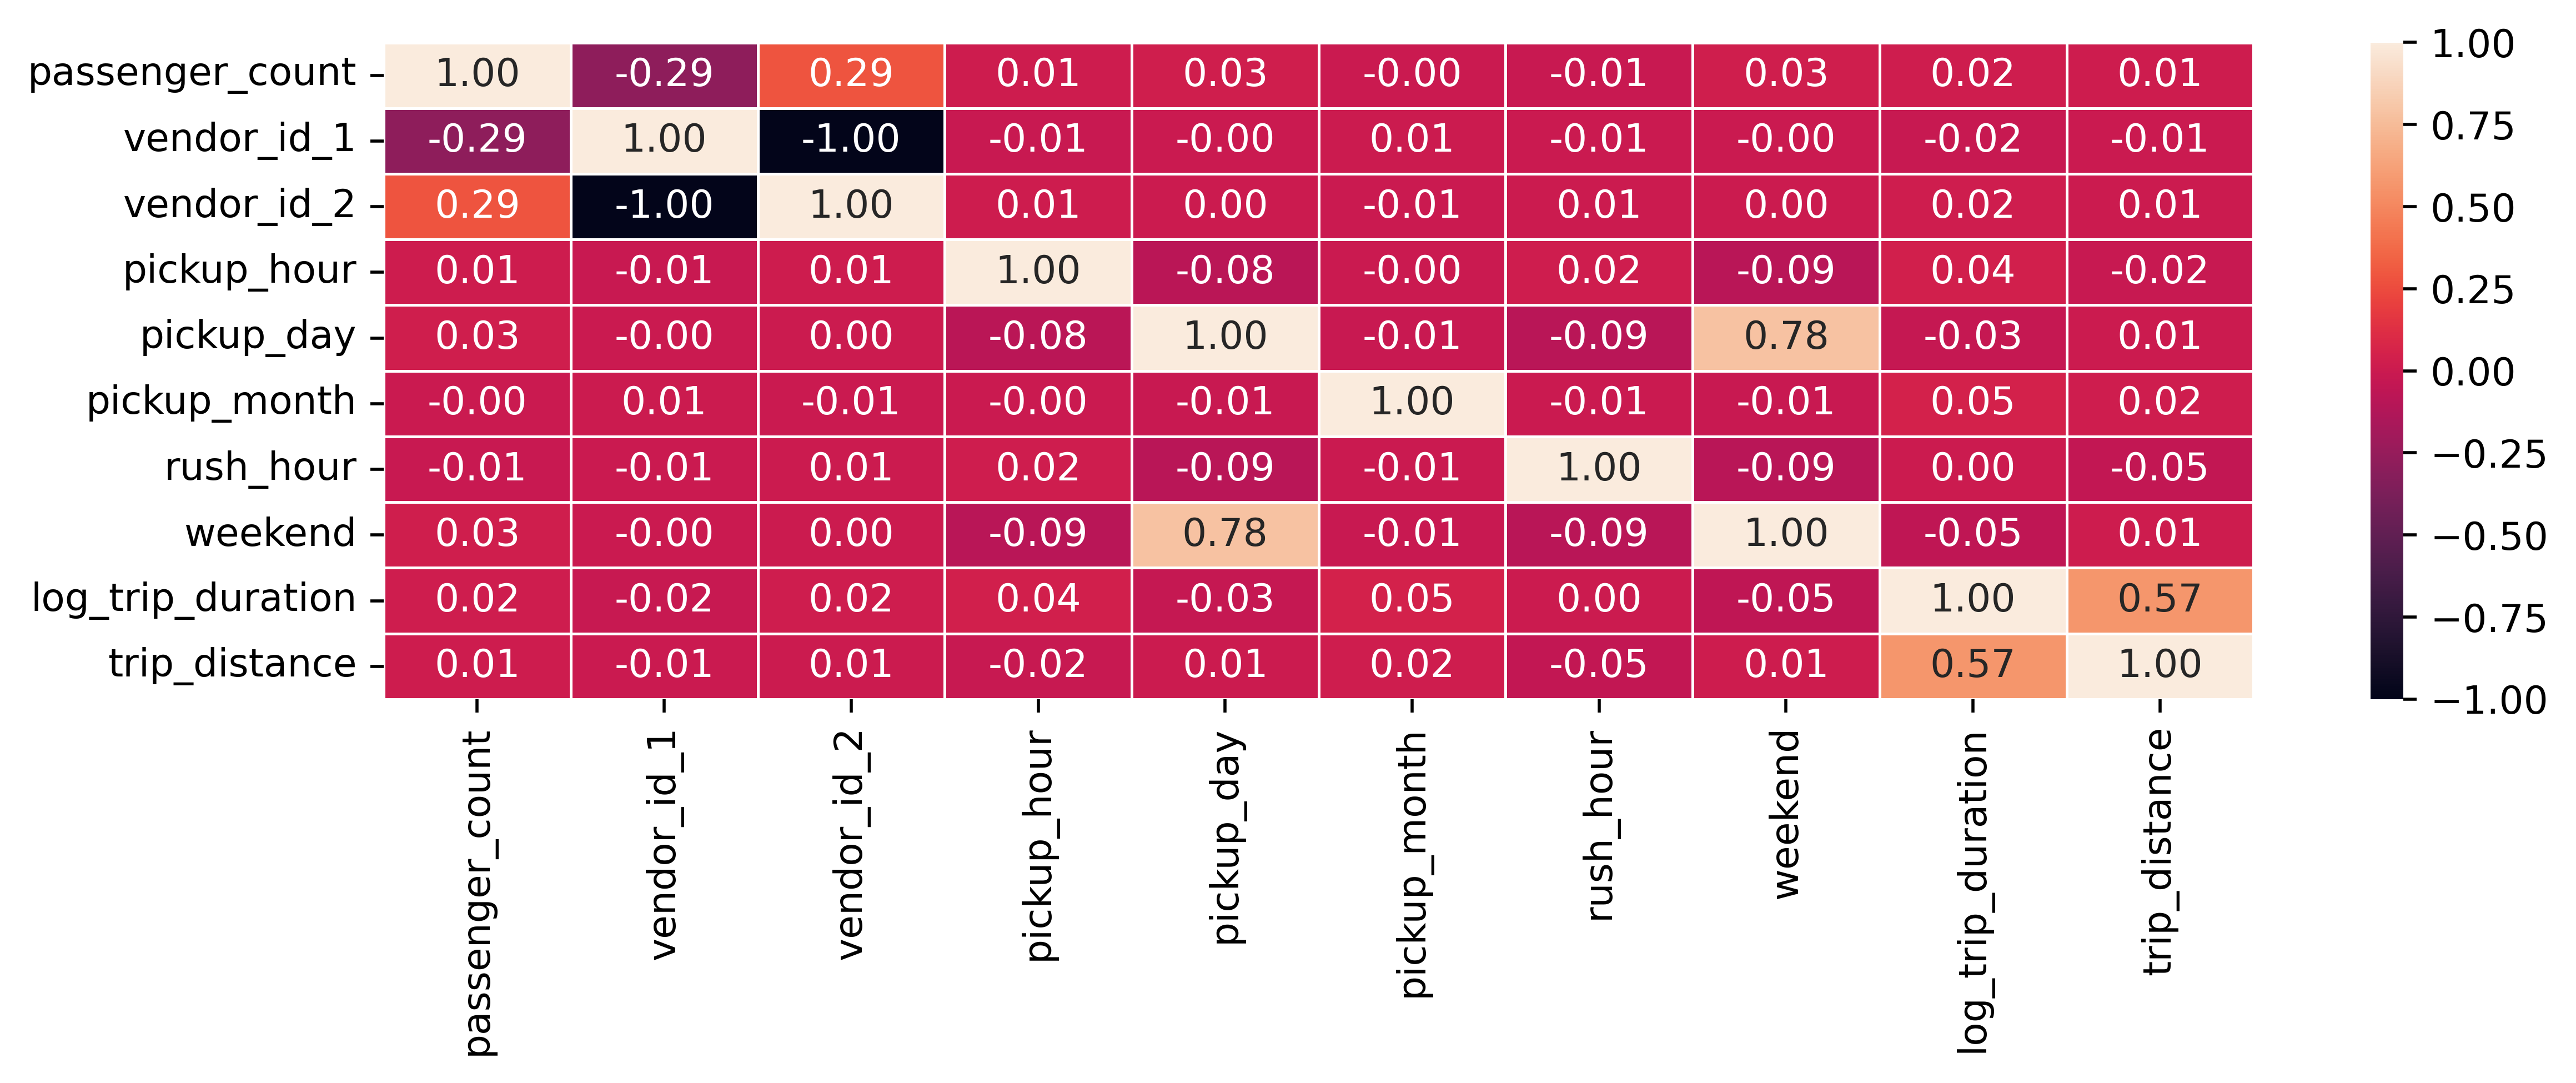

In [50]:
plt.figure(figsize=(10,4), dpi =500)
sns.heatmap(corr_cont,annot=True,fmt=".2f", linewidth=.5)
plt.tight_layout()
plt.show()

In [51]:
# View Data
df_encoded_dt

passenger_count  vendor_id_1  vendor_id_2  pickup_hour  pickup_day  \
0                     1          0.0          1.0           16           0   
1                     2          1.0          0.0           23           4   
2                     2          0.0          1.0           17           6   
3                     6          0.0          1.0            9           1   
4                     1          1.0          0.0            6           2   
...                 ...          ...          ...          ...         ...   
729317                2          0.0          1.0           13           5   
729318                1          1.0          0.0            0           0   
729319                1          1.0          0.0           18           4   
729320                1          1.0          0.0            9           6   
729321                4          0.0          1.0           17           4   

        pickup_month  rush_hour  weekend  log_trip_duration  trip_distance  
0                  2          0        0           5.993961       1.199073  
1                  3          0        0           7.003974       4.129111  
2                  2          1        1           7.400010       7.250753  
3                  1          1        0           7.040536       2.361097  
4                  2          0        0           6.744059       4.328534  
...              ...        ...      ...                ...            ...  
729317             5          0        1           5.693732       1.120223  
729318             2          0        0           5.755742       0.728705  
729319             4          1        0           6.513230       2.298776  
729320             6          1        1           6.104793       0.846316  
729321             1          1        0           7.110696       5.945837  

[729322 rows x 10 columns]

In [52]:
# List of numerical columns to calculate IQR for
numerical_columns = df_encoded_dt.columns

# Function to calculate IQR and identify outliers
def detect_outliers_iqr(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return Q1, Q3, IQR, outliers

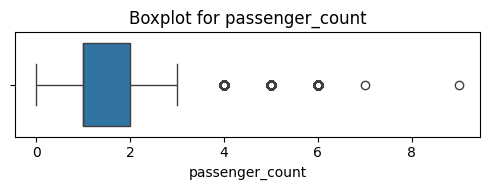

Column: passenger_count
Q1: 1.0, Q3: 2.0, IQR: 1.0
Number of outliers in passenger_count: 77085




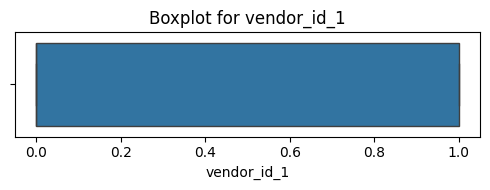

Column: vendor_id_1
Q1: 0.0, Q3: 1.0, IQR: 1.0
Number of outliers in vendor_id_1: 0




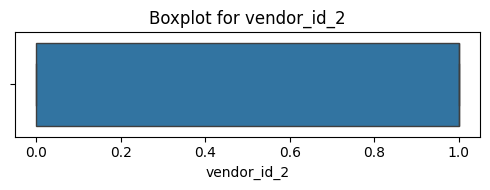

Column: vendor_id_2
Q1: 0.0, Q3: 1.0, IQR: 1.0
Number of outliers in vendor_id_2: 0




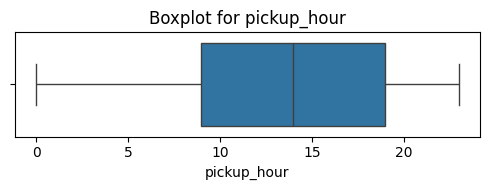

Column: pickup_hour
Q1: 9.0, Q3: 19.0, IQR: 10.0
Number of outliers in pickup_hour: 0




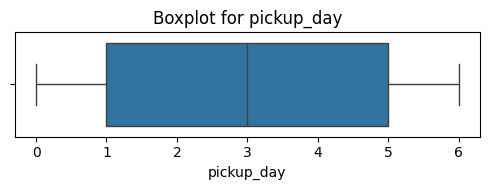

Column: pickup_day
Q1: 1.0, Q3: 5.0, IQR: 4.0
Number of outliers in pickup_day: 0




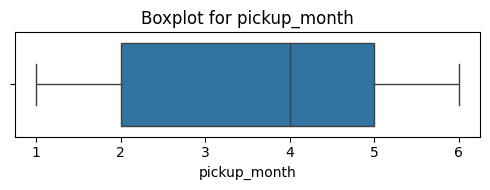

Column: pickup_month
Q1: 2.0, Q3: 5.0, IQR: 3.0
Number of outliers in pickup_month: 0




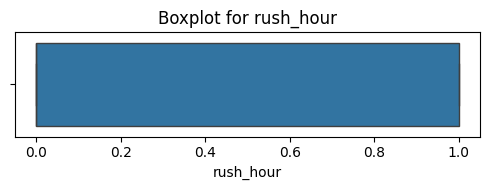

Column: rush_hour
Q1: 0.0, Q3: 1.0, IQR: 1.0
Number of outliers in rush_hour: 0




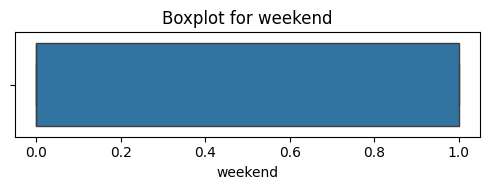

Column: weekend
Q1: 0.0, Q3: 1.0, IQR: 1.0
Number of outliers in weekend: 0




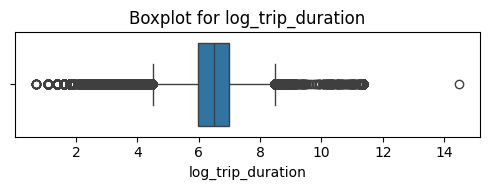

Column: log_trip_duration
Q1: 5.986452005284438, Q3: 6.98100574072173, IQR: 0.9945537354372922
Number of outliers in log_trip_duration: 9647




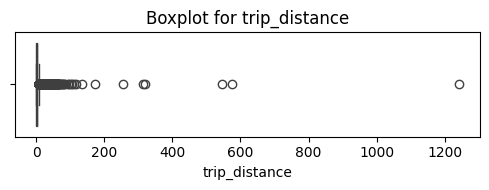

Column: trip_distance
Q1: 1.232695033161347, Q3: 3.876481100483982, IQR: 2.643786067322635
Number of outliers in trip_distance: 70318


In [53]:
# Loop through each numerical column, calculate IQR, detect outliers, and create boxplots
for column in numerical_columns:
    Q1, Q3, IQR, outliers = detect_outliers_iqr(df_encoded_dt, column)

    print( "\n" )
    # Create a boxplot to visualize the outliers
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df_encoded_dt[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()    
    
    print(f"Column: {column}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Number of outliers in {column}: {len(outliers)}")

In [54]:
# Defining the numerical columns for which we'll check and remove outliers
numerical_columns = df_encoded_dt.columns

# Function to calculate IQR and filter out rows with outliers
def remove_outliers_iqr(data, column):
    # Calculating Q1 and Q3 (25th and 75th percentiles)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calculating IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Setting up bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keeping only the rows within the bounds (i.e., without outliers)
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data_no_outliers

# Making a copy of the dataset so we can modify it safely
df_no_outliers = df_encoded_dt.copy()

# Looping through each numerical column to remove outliers
for column in numerical_columns:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, column)

# Checking how many rows were removed to understand the impact
print("Original dataset shape:", df_encoded_dt.shape)
print("New dataset shape after removing outliers:", df_no_outliers.shape)

Original dataset shape: (729322, 10)
New dataset shape after removing outliers: (581889, 10)


In [55]:
# View Data
df_no_outliers

passenger_count  vendor_id_1  vendor_id_2  pickup_hour  pickup_day  \
0                     1          0.0          1.0           16           0   
1                     2          1.0          0.0           23           4   
2                     2          0.0          1.0           17           6   
4                     1          1.0          0.0            6           2   
5                     2          0.0          1.0           18           6   
...                 ...          ...          ...          ...         ...   
729316                1          0.0          1.0           22           0   
729317                2          0.0          1.0           13           5   
729318                1          1.0          0.0            0           0   
729319                1          1.0          0.0           18           4   
729320                1          1.0          0.0            9           6   

        pickup_month  rush_hour  weekend  log_trip_duration  trip_distance  
0                  2          0        0           5.993961       1.199073  
1                  3          0        0           7.003974       4.129111  
2                  2          1        1           7.400010       7.250753  
4                  2          0        0           6.744059       4.328534  
5                  2          1        1           7.283448       3.119711  
...              ...        ...      ...                ...            ...  
729316             1          0        0           6.109248       2.201793  
729317             5          0        1           5.693732       1.120223  
729318             2          0        0           5.755742       0.728705  
729319             4          1        0           6.513230       2.298776  
729320             6          1        1           6.104793       0.846316  

[581889 rows x 10 columns]

In [56]:
# Find the pearson correlations matrix
new_corr_cont = df_no_outliers.corr(method = 'pearson')
new_corr_cont 

passenger_count  vendor_id_1  vendor_id_2  pickup_hour  \
passenger_count           1.000000    -0.093346     0.093346     0.027762   
vendor_id_1              -0.093346     1.000000    -1.000000    -0.012232   
vendor_id_2               0.093346    -1.000000     1.000000     0.012232   
pickup_hour               0.027762    -0.012232     0.012232     1.000000   
pickup_day                0.045756    -0.002585     0.002585    -0.082030   
pickup_month              0.005509     0.003498    -0.003498    -0.001713   
rush_hour                -0.023148    -0.005847     0.005847     0.014464   
weekend                   0.054134    -0.004819     0.004819    -0.087374   
log_trip_duration         0.022490    -0.003797     0.003797     0.050814   
trip_distance             0.011426    -0.000555     0.000555    -0.019050   

                   pickup_day  pickup_month  rush_hour   weekend  \
passenger_count      0.045756      0.005509  -0.023148  0.054134   
vendor_id_1         -0.002585      0.003498  -0.005847 -0.004819   
vendor_id_2          0.002585     -0.003498   0.005847  0.004819   
pickup_hour         -0.082030     -0.001713   0.014464 -0.087374   
pickup_day           1.000000     -0.014906  -0.091857  0.780754   
pickup_month        -0.014906      1.000000  -0.006147 -0.009639   
rush_hour           -0.091857     -0.006147   1.000000 -0.097994   
weekend              0.780754     -0.009639  -0.097994  1.000000   
log_trip_duration   -0.029501      0.049237   0.013796 -0.061357   
trip_distance        0.036662      0.015914  -0.052187  0.040918   

                   log_trip_duration  trip_distance  
passenger_count             0.022490       0.011426  
vendor_id_1                -0.003797      -0.000555  
vendor_id_2                 0.003797       0.000555  
pickup_hour                 0.050814      -0.019050  
pickup_day                 -0.029501       0.036662  
pickup_month                0.049237       0.015914  
rush_hour                   0.013796      -0.052187  
weekend                    -0.061357       0.040918  
log_trip_duration           1.000000       0.673438  
trip_distance               0.673438       1.000000

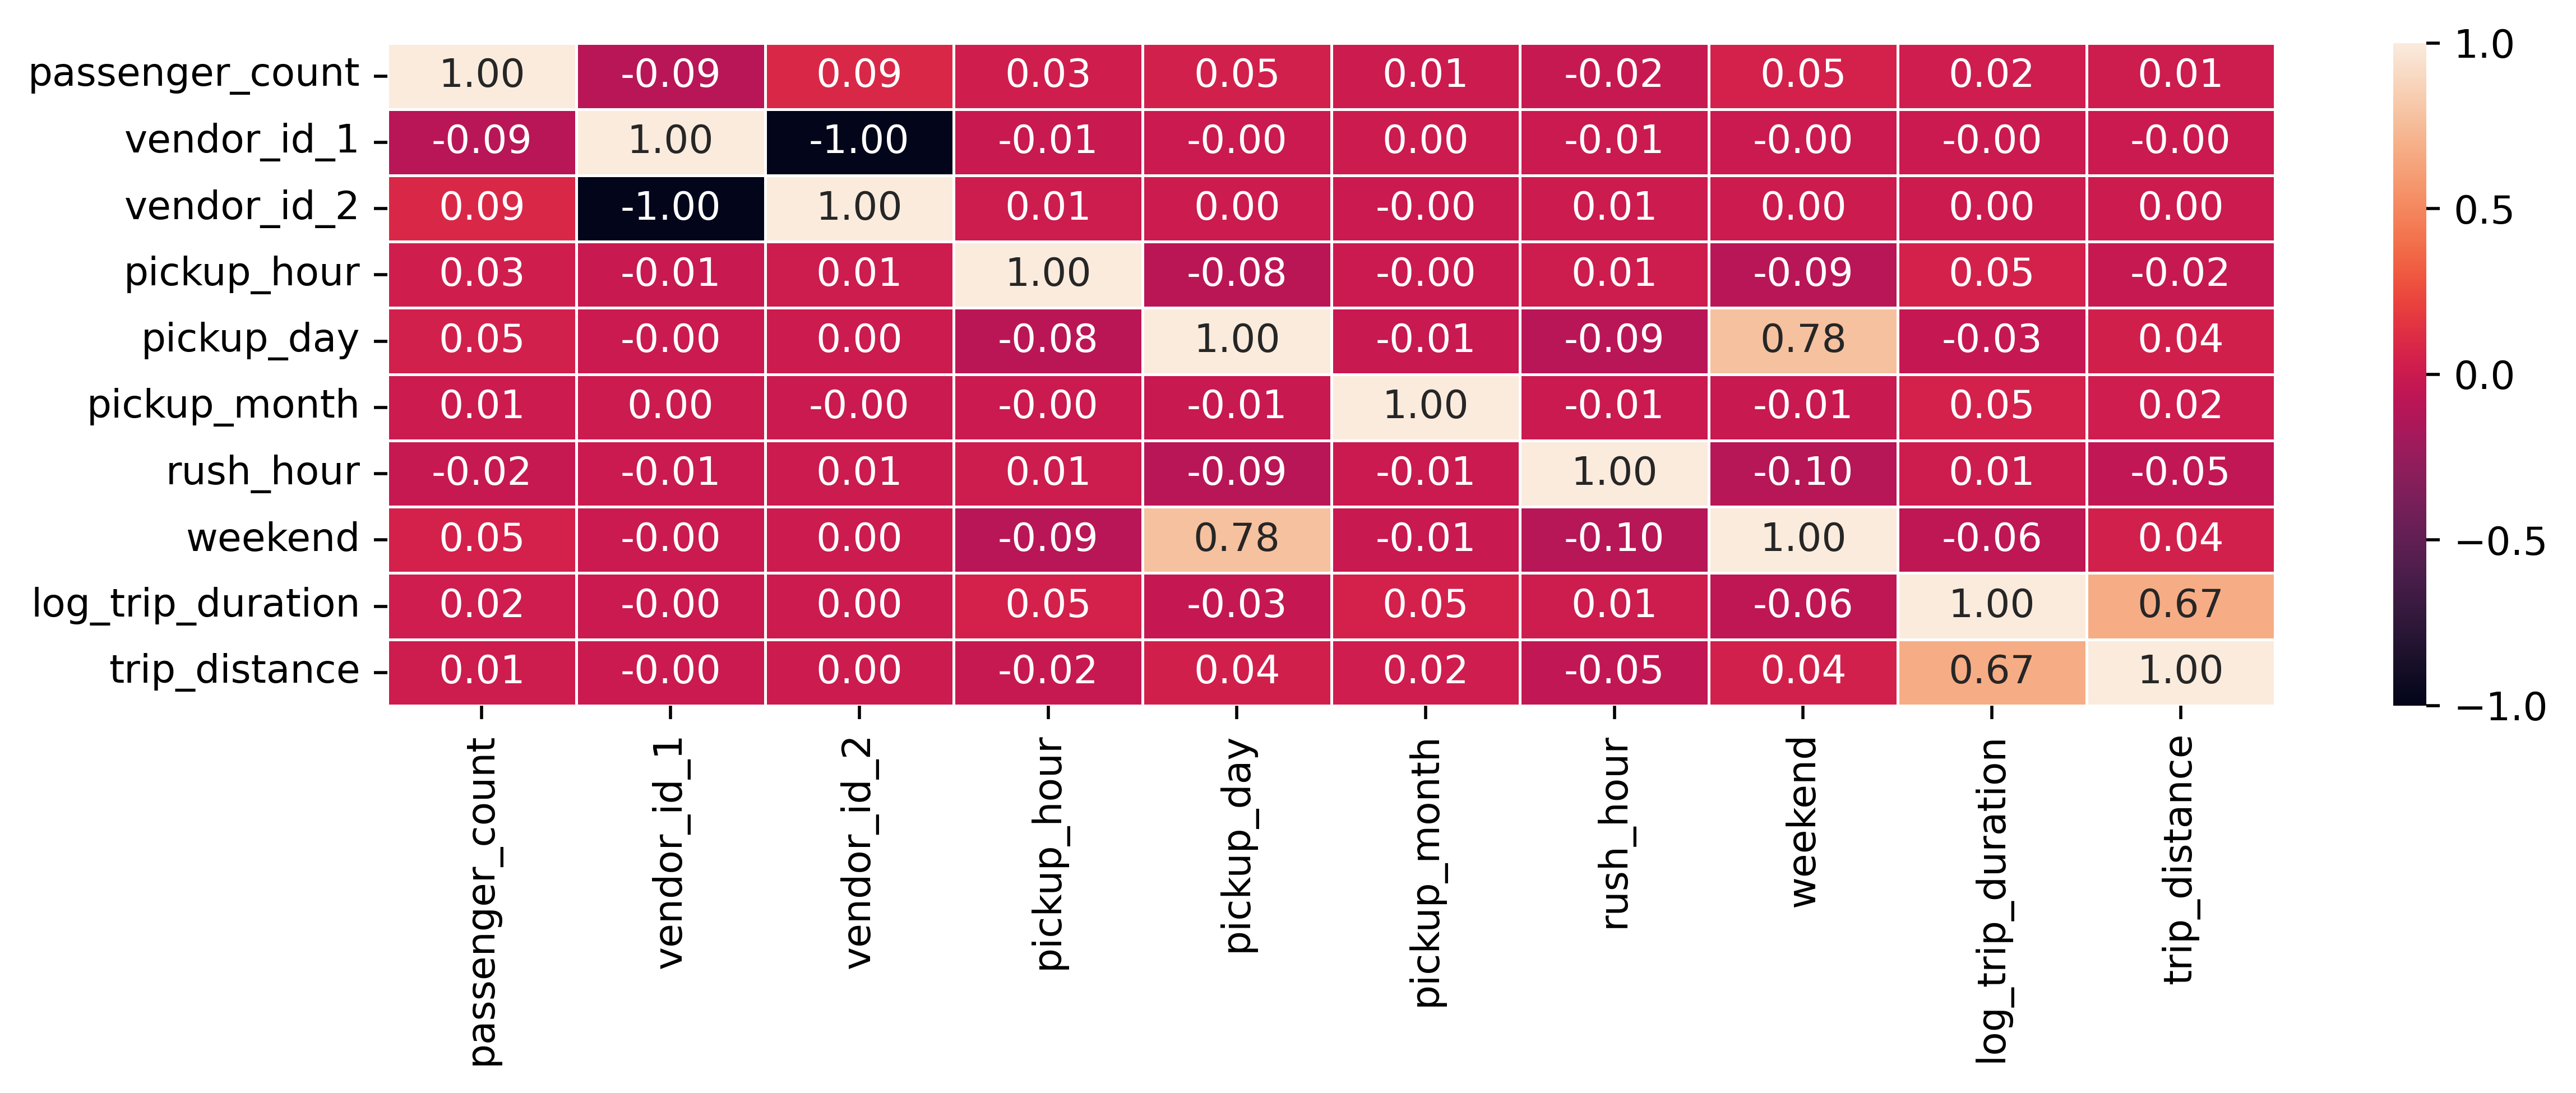

In [57]:
plt.figure(figsize=(10,4), dpi =500)
sns.heatmap(new_corr_cont,annot=True,fmt=".2f", linewidth=.5)
plt.tight_layout()
plt.show()